In [1]:
import maxentep
import maxent
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as ss
plt.style.use('seaborn-darkgrid')
# disabling gpu for now
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Set-up Initial Guesses

In [2]:
M = 3
R = np.abs(np.random.normal(size=(M,M), loc=1.25))
R = R / np.sum(R, axis=1).reshape(M,1)
R, np.sum(R, axis=1)

(array([[0.43121941, 0.1857378 , 0.38304278],
        [0.59522918, 0.37485773, 0.02991309],
        [0.22662156, 0.14332677, 0.63005166]]),
 array([1., 1., 1.]))

In [3]:
# compartment parameters
compartments = ['E', 'A', 'I', 'R']
C = len(compartments)
tmat = maxentep.TransitionMatrix(compartments, [1,2])
tmat.add_transition('E', 'A', 5, 0)
tmat.add_transition('A', 'I', 3, 0)
tmat.add_transition('I', 'R', 14, 0)
tmat.value

array([[0.8       , 0.2       , 0.        , 0.        ],
       [0.        , 0.66666667, 0.33333333, 0.        ],
       [0.        , 0.        , 0.92857143, 0.07142857],
       [0.        , 0.        , 0.        , 1.        ]])

In [7]:
start = np.zeros((M, C))
start[0, 1] = 0.1
beta = np.array([0.2, 0.2])
infect = maxentep.ContactInfectionLayer(beta, [1,2])

## Build Metapopulation Keras Model

In [8]:
model = maxentep.TrainableMetaModel(start, R, tmat.value, infect, 150, lambda traj: (traj[0, 100, 0, 3] - 0.3)**2)

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop())
utraj = model.get_traj()
model.fit()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
100/100 [==============================] - 6s 58ms/step - loss: 0.0218 - output_2_loss: 0.0218


In [10]:
model.summary()

Model: "trainable_meta_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
trainable_input_layer_3 (Tra multiple                  9         
_________________________________________________________________
trainable_input_layer_4 (Tra multiple                  16        
_________________________________________________________________
trainable_input_layer_5 (Tra multiple                  12        
_________________________________________________________________
metapop_layer_1 (MetapopLaye multiple                  2         
_________________________________________________________________
traj (AddSusceptibleLayer)   multiple                  0         
_________________________________________________________________
lambda_1 (Lambda)            multiple                  0         
Total params: 39
Trainable params: 39
Non-trainable params: 0
________________________________________________

## Plot agreement with constraint

We only set agreement at `T = 100`

In [11]:
traj = model.get_traj()

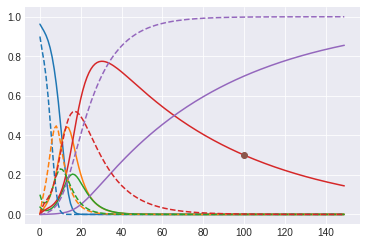

In [12]:
plt.plot(traj[0, :, 0, :])
plt.gca().set_prop_cycle(None)
plt.plot(utraj[0, :, 0, :], linestyle='--')
plt.plot(100, 0.3, 'o')